<a href="https://colab.research.google.com/github/50shadescode/-my_project/blob/main/African%20Climate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files

# Upload the file
uploaded = files.upload()



Saving Africa_climate_change.csv to Africa_climate_change.csv


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV into a DataFrame
df = pd.read_csv("Africa_climate_change.csv")

# Display the first few rows
print(df.head())

# Display basic information about the dataset
print(df.info())

# Check for missing values
print("\nMissing Values:\n", df.isnull().sum())

# Clean the data
df = df.dropna()  # Drop rows with missing values

# Remove duplicates if any
df = df.drop_duplicates()

# Confirm cleaning
print("\nData after cleaning:\n", df.info())

              DATE  PRCP  TAVG  TMAX  TMIN   COUNTRY
0  19800101 000000   NaN  54.0  61.0  43.0   Tunisia
1  19800101 000000   NaN  49.0  55.0  41.0   Tunisia
2  19800101 000000   0.0  72.0  86.0  59.0  Cameroon
3  19800101 000000   NaN  50.0  55.0  43.0   Tunisia
4  19800101 000000   NaN  75.0  91.0   NaN  Cameroon
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 464815 entries, 0 to 464814
Data columns (total 6 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   DATE     464815 non-null  object 
 1   PRCP     177575 non-null  float64
 2   TAVG     458439 non-null  float64
 3   TMAX     363901 non-null  float64
 4   TMIN     332757 non-null  float64
 5   COUNTRY  464815 non-null  object 
dtypes: float64(4), object(2)
memory usage: 21.3+ MB
None

Missing Values:
 DATE            0
PRCP       287240
TAVG         6376
TMAX       100914
TMIN       132058
COUNTRY         0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 113515 entries, 2 

2. Plot a Line Chart for Average Temperature Fluctuations in Tunisia and Cameroon

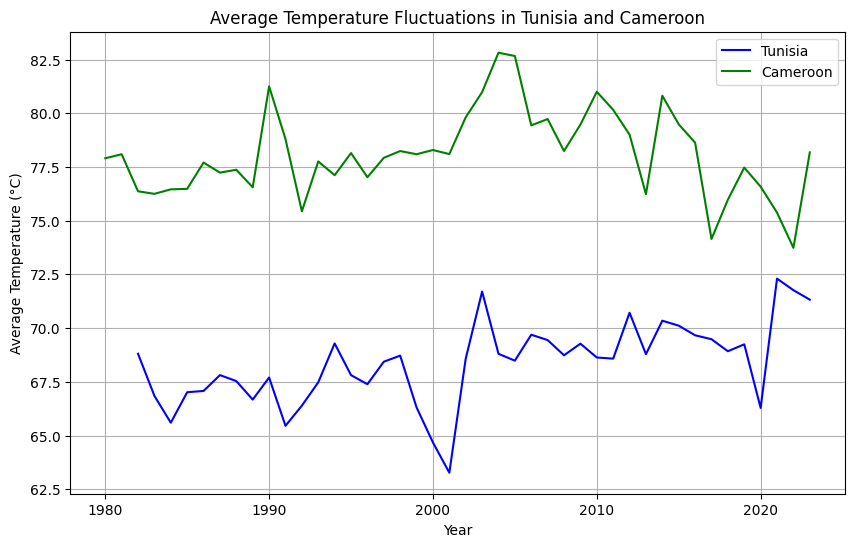

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure 'date' is in datetime format and extract 'Year'
df['date'] = pd.to_datetime(df['date'])
df['Year'] = df['date'].dt.year

# Filter data for Tunisia and Cameroon
tunisia_data = df[df['country'] == 'Tunisia']
cameroon_data = df[df['country'] == 'Cameroon']

# Group by Year and calculate average temperature (tavg)
tunisia_avg_temp = tunisia_data.groupby('Year')['tavg'].mean()
cameroon_avg_temp = cameroon_data.groupby('Year')['tavg'].mean()

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(tunisia_avg_temp, label="Tunisia", color="blue")
plt.plot(cameroon_avg_temp, label="Cameroon", color="green")
plt.xlabel("Year")
plt.ylabel("Average Temperature (°C)")
plt.title("Average Temperature Fluctuations in Tunisia and Cameroon")
plt.legend()
plt.grid()
plt.show()


Zoom in to only include data between 1980 and 2005, try to customize the axes labels

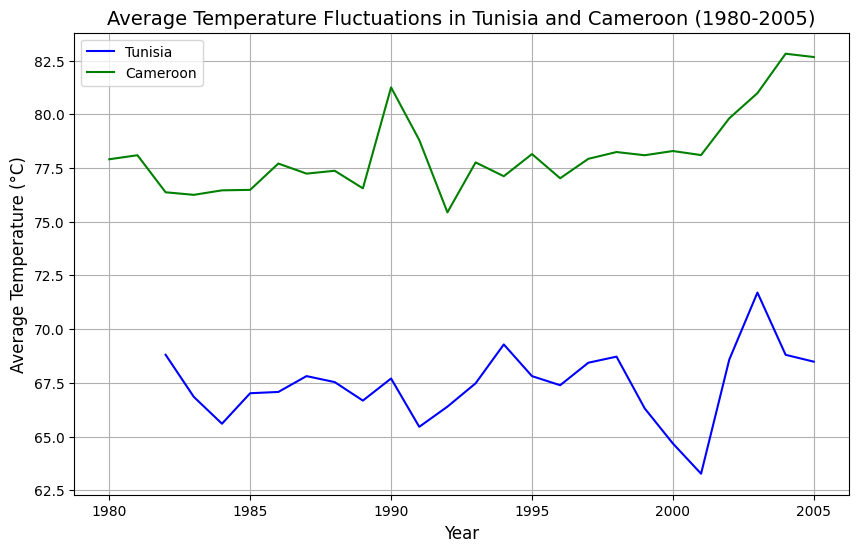

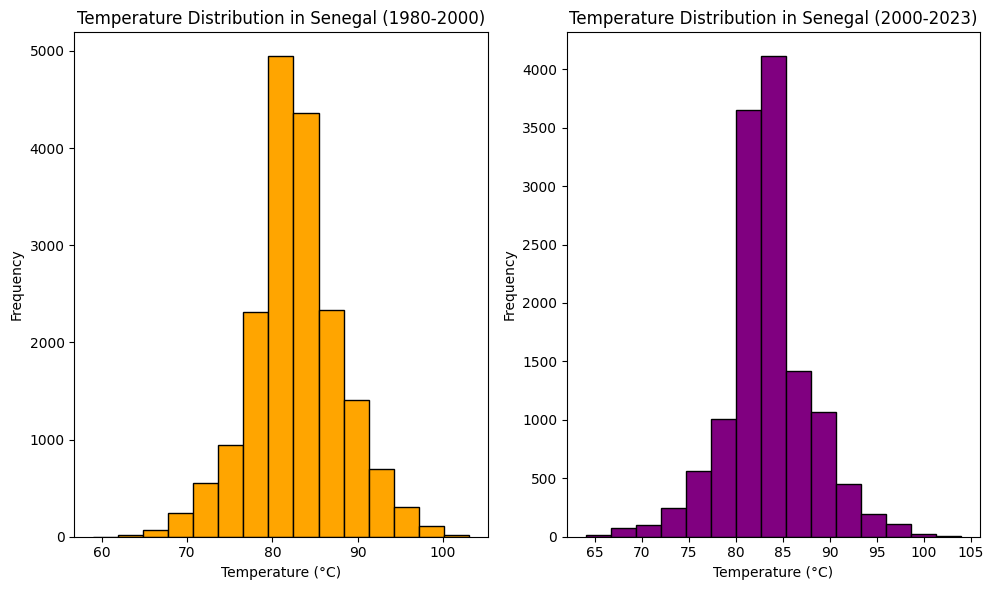

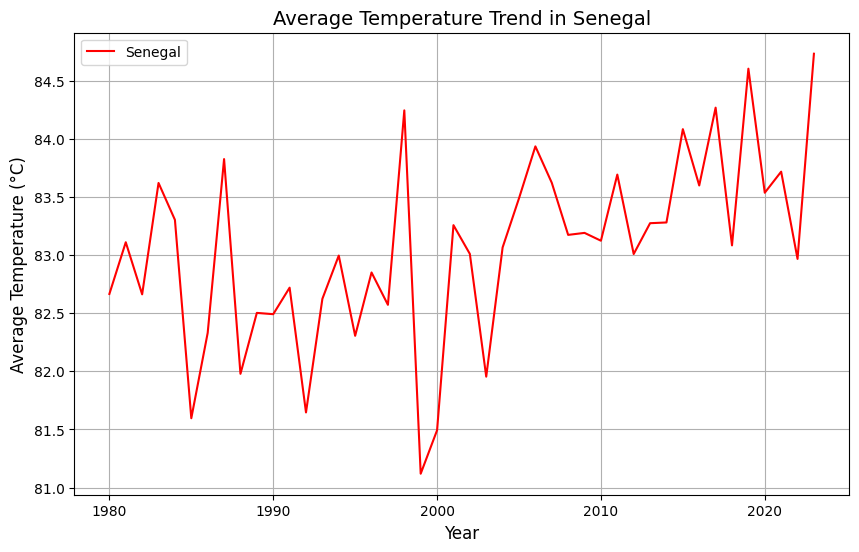

<Figure size 1000x600 with 0 Axes>

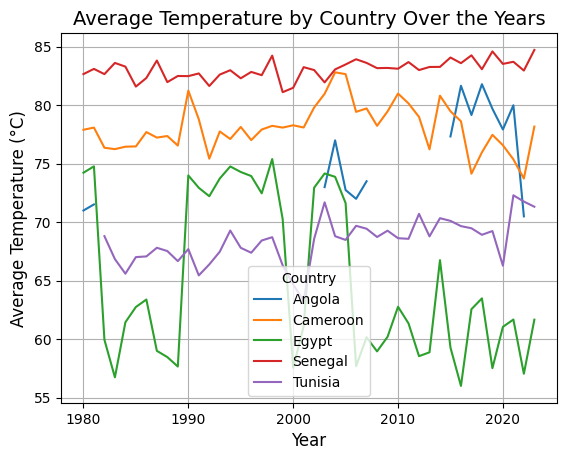

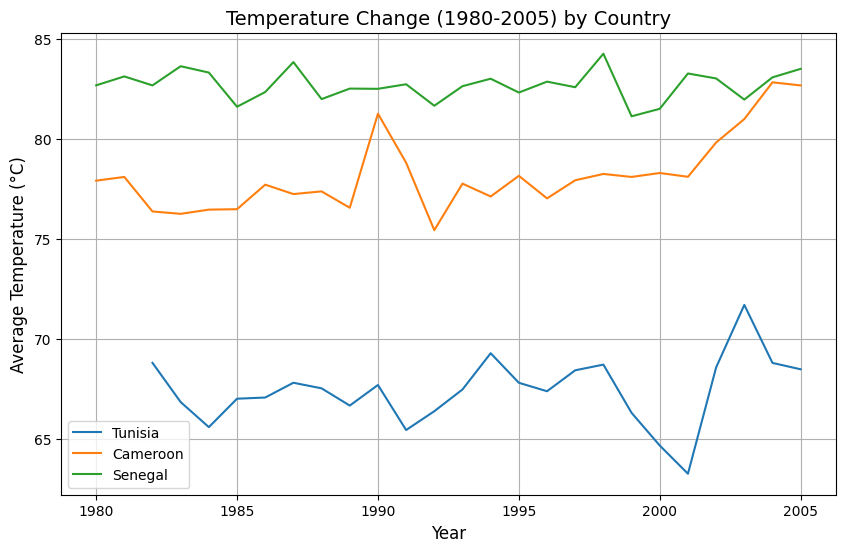

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure 'date' is in datetime format and extract 'Year'
df['date'] = pd.to_datetime(df['date'])
df['Year'] = df['date'].dt.year

# Filter data for Tunisia and Cameroon
tunisia_data = df[df['country'] == 'Tunisia']
cameroon_data = df[df['country'] == 'Cameroon']

# Filter data for Senegal
senegal_data = df[df['country'] == 'Senegal']

# Zoom in to include data between 1980 and 2005
df_zoomed = df[(df['Year'] >= 1980) & (df['Year'] <= 2005)]

# Group by Year and calculate average temperature (tavg) for zoomed data
tunisia_avg_temp = df_zoomed[df_zoomed['country'] == 'Tunisia'].groupby('Year')['tavg'].mean()
cameroon_avg_temp = df_zoomed[df_zoomed['country'] == 'Cameroon'].groupby('Year')['tavg'].mean()

# Plot Average Temperature per Country (Zoomed Data)
plt.figure(figsize=(10, 6))
plt.plot(tunisia_avg_temp, label="Tunisia", color="blue")
plt.plot(cameroon_avg_temp, label="Cameroon", color="green")
plt.xlabel("Year", fontsize=12)
plt.ylabel("Average Temperature (°C)", fontsize=12)
plt.title("Average Temperature Fluctuations in Tunisia and Cameroon (1980-2005)", fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

# Create histograms for temperature distribution in Senegal (1980-2000) and (2000-2023)
senegal_1980_2000 = senegal_data[(senegal_data['Year'] >= 1980) & (senegal_data['Year'] <= 2000)]
senegal_2000_2023 = senegal_data[(senegal_data['Year'] >= 2000) & (senegal_data['Year'] <= 2023)]

plt.figure(figsize=(10, 6))

# Histogram for 1980-2000
plt.subplot(1, 2, 1)
plt.hist(senegal_1980_2000['tavg'], bins=15, color='orange', edgecolor='black')
plt.title("Temperature Distribution in Senegal (1980-2000)", fontsize=12)
plt.xlabel("Temperature (°C)", fontsize=10)
plt.ylabel("Frequency", fontsize=10)

# Histogram for 2000-2023
plt.subplot(1, 2, 2)
plt.hist(senegal_2000_2023['tavg'], bins=15, color='purple', edgecolor='black')
plt.title("Temperature Distribution in Senegal (2000-2023)", fontsize=12)
plt.xlabel("Temperature (°C)", fontsize=10)
plt.ylabel("Frequency", fontsize=10)

plt.tight_layout()
plt.show()

# Answering additional questions with appropriate visuals:

# 1. What is the temperature trend in Senegal over the years?
senegal_avg_temp = senegal_data.groupby('Year')['tavg'].mean()

plt.figure(figsize=(10, 6))
plt.plot(senegal_avg_temp, label="Senegal", color="red")
plt.xlabel("Year", fontsize=12)
plt.ylabel("Average Temperature (°C)", fontsize=12)
plt.title("Average Temperature Trend in Senegal", fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

# 2. How does temperature vary by country over the years?
country_avg_temp = df.groupby(['Year', 'country'])['tavg'].mean().unstack()

plt.figure(figsize=(10, 6))
country_avg_temp.plot()
plt.xlabel("Year", fontsize=12)
plt.ylabel("Average Temperature (°C)", fontsize=12)
plt.title("Average Temperature by Country Over the Years", fontsize=14)
plt.grid(True)
plt.legend(title="Country")
plt.show()

# 3. Is there a notable temperature change between 1980 and 2005 for each country?
plt.figure(figsize=(10, 6))

for country in ['Tunisia', 'Cameroon', 'Senegal']:
    country_data = df_zoomed[df_zoomed['country'] == country]
    avg_temp = country_data.groupby('Year')['tavg'].mean()
    plt.plot(avg_temp, label=country)

plt.xlabel("Year", fontsize=12)
plt.ylabel("Average Temperature (°C)", fontsize=12)
plt.title("Temperature Change (1980-2005) by Country", fontsize=14)
plt.legend()
plt.grid(True)
plt.show()


Create Histograms to show temperature distribution in Senegal between [1980,2000] and [2000,2023] (in the same figure). Describe the obtained results.

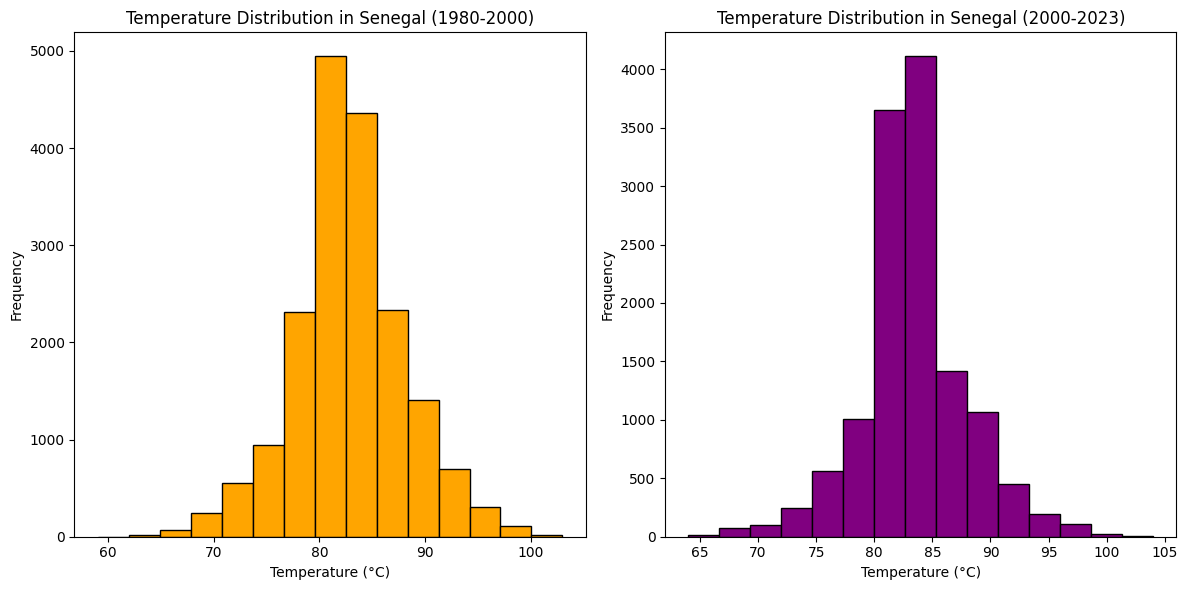

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure 'date' is in datetime format and extract 'Year'
df['date'] = pd.to_datetime(df['date'])
df['Year'] = df['date'].dt.year

# Filter data for Senegal
senegal_data = df[df['country'] == 'Senegal']

# Create two datasets for the periods 1980-2000 and 2000-2023
senegal_1980_2000 = senegal_data[(senegal_data['Year'] >= 1980) & (senegal_data['Year'] <= 2000)]
senegal_2000_2023 = senegal_data[(senegal_data['Year'] >= 2000) & (senegal_data['Year'] <= 2023)]

# Create histograms for temperature distribution in Senegal (1980-2000) and (2000-2023)
plt.figure(figsize=(12, 6))

# Histogram for 1980-2000
plt.subplot(1, 2, 1)
plt.hist(senegal_1980_2000['tavg'], bins=15, color='orange', edgecolor='black')
plt.title("Temperature Distribution in Senegal (1980-2000)", fontsize=12)
plt.xlabel("Temperature (°C)", fontsize=10)
plt.ylabel("Frequency", fontsize=10)

# Histogram for 2000-2023
plt.subplot(1, 2, 2)
plt.hist(senegal_2000_2023['tavg'], bins=15, color='purple', edgecolor='black')
plt.title("Temperature Distribution in Senegal (2000-2023)", fontsize=12)
plt.xlabel("Temperature (°C)", fontsize=10)
plt.ylabel("Frequency", fontsize=10)

plt.tight_layout()
plt.show()


Select the best chart to show the Average temperature per country.

<Figure size 1200x600 with 0 Axes>

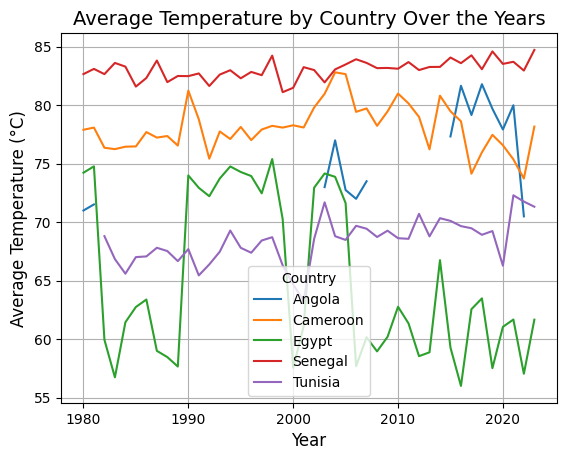

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure 'date' is in datetime format and extract 'Year'
df['date'] = pd.to_datetime(df['date'])
df['Year'] = df['date'].dt.year

# Group by Year and country, then calculate the average temperature (tavg)
country_avg_temp = df.groupby(['Year', 'country'])['tavg'].mean().unstack()

# Plot Average Temperature per Country
plt.figure(figsize=(12, 6))

# Plotting the data for each country
country_avg_temp.plot()

# Customizing the plot
plt.xlabel("Year", fontsize=12)
plt.ylabel("Average Temperature (°C)", fontsize=12)
plt.title("Average Temperature by Country Over the Years", fontsize=14)
plt.grid(True)
plt.legend(title="Country")

plt.show()
